In [17]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../../lib")
from stpalette import palette_WM4007_rna, palette_WM4237_rna
from from_pyfish import plotFishCustom, plotFishTV, process_data, fish_plot, setup_figure

import scanpy as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
model = 'WM4237'
palette_rna = palette_WM4007_rna if model=='WM4007' else palette_WM4237_rna

In [184]:
dataPath = '../../data/'

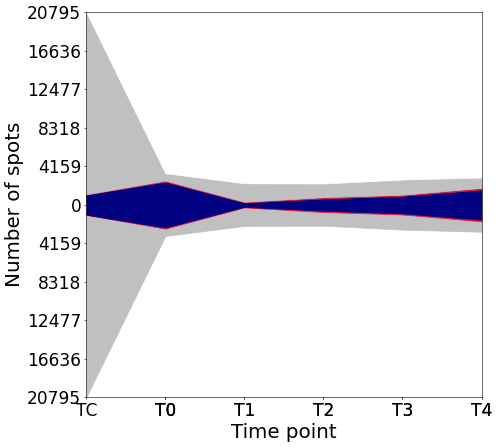

In [186]:
area_mm2_per_spot = (6.5 * 6.5) / 4992

se_measured_area = pd.read_excel('c:/Projects/A_ST/WM4237_WM4007_Tumor_Volume.xlsx', sheet_name='Sheet1', index_col=[0,1])['Area'].dropna().xs(model, level='Model')

se_expected_number_of_spots = 2 * (se_measured_area / area_mm2_per_spot).astype(int)

spots_all = sc.read(dataPath + f'ad_all_scaled_unfiltered_st_{model}.h5ad').obs['T'].to_frame()
spots_all['tv'] = 1
spots_all.loc[spots_all.index.isin(spots_human.index), 'tv'] = 2
spots_human = sc.read(dataPath + f'ad_all_human_clustered_st_{model}.h5ad').obs['T']

# Add dummy missing spots
spots_all_full = spots_all.copy()
added = [spots_all_full]
for t in se_expected_number_of_spots.index:
    number_of_existing_spots = spots_all[spots_all['T']==t].shape[0]
    number_of_missing_spots = se_expected_number_of_spots[t] - number_of_existing_spots
    ind = 'dm-' + pd.Index(np.array(list(range(number_of_missing_spots))).astype(str)) + '-' + t
    added.append(pd.DataFrame(index=ind, columns=['T', 'tv'], data=[[t, 0]]*len(ind)))
    
spots_all_full = pd.concat(added)
spots_all_full = spots_all_full.loc[spots_all_full['T']!='TE']

plotFishTV(spots_all_full, palette={'0': 'silver', '1': 'crimson', '2': 'navy'}, identity='tv', absolute=True)

In [43]:
ad_all_obs = sc.read(dataPath + 'ad_all_human_clustered_st_%s_to_export.h5ad' % model).obs[['T', 'rna_cluster', 'im_cluster', 'cnv_cluster']].astype(str).astype('category')

../../lib\from_pyfish.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['fID'] = obs[identity].astype(int).values
../../lib\from_pyfish.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['fSTEP'] = obs['T'].astype(str).replace({v:k for k,v in T_str_mapping.items()}).astype(int).values
../../lib\from_pyfish.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

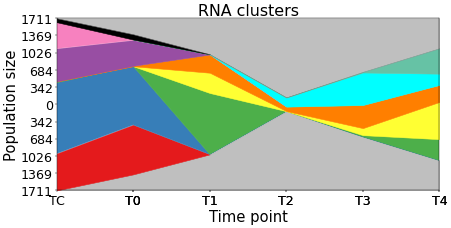

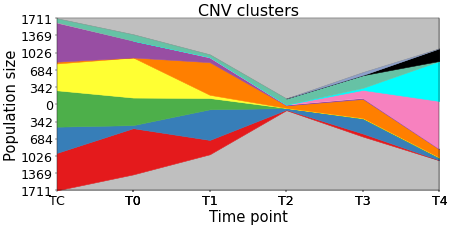

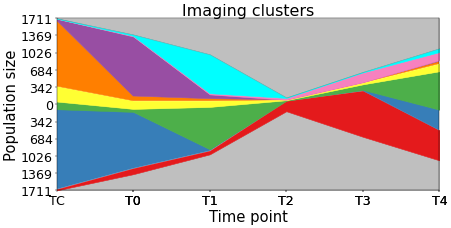

In [6]:
for modality in ['RNA', 'CNV', 'Imaging']:
    plotFishCustom(ad_all_obs[ad_all_obs['T'].isin(['TE', 'T0', 'TC', 'T1', 'T2', 'T3', 'T4'])].copy(), modality=modality, palette=palette1, absolute=True)    

../../lib\from_pyfish.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['fID'] = obs[identity].astype(int).values
../../lib\from_pyfish.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs['fSTEP'] = obs['T'].astype(str).replace({v:k for k,v in T_str_mapping.items()}).astype(int).values
../../lib\from_pyfish.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

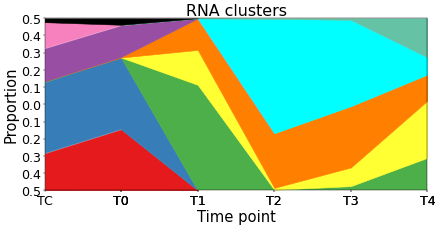

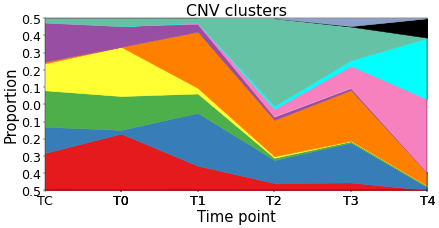

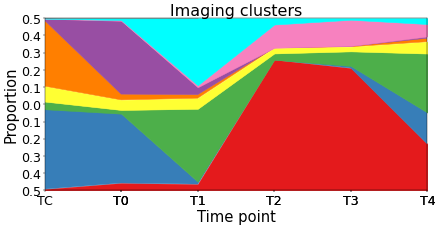

In [7]:
for modality in ['RNA', 'CNV', 'Imaging']:
    plotFishCustom(ad_all_obs[ad_all_obs['T'].isin(['TE', 'T0', 'TC', 'T1', 'T2', 'T3', 'T4'])].copy(), modality=modality, palette=palette1, absolute=False)    